#### Importing relevant Libraries

In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load your data with the updated path
data = pd.read_excel(r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx', index_col='time', parse_dates=True)

# Select the columns for analysis
rain_data = data['Mean_Rainfall']

# Resample the data to monthly frequency and calculate the mean
monthly_rain_data = rain_data.resample('M').sum()


C:\Users\harsh\AppData\Local\Temp\ipykernel_23460\1198574093.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rain_data = rain_data.resample('M').sum()


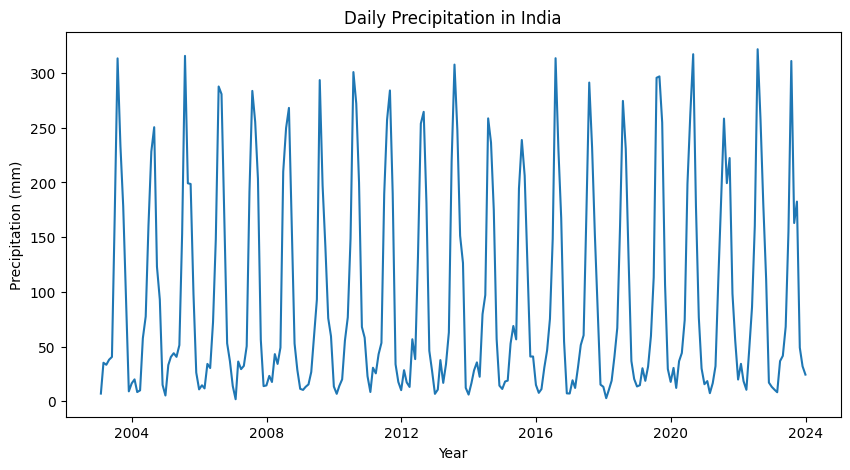

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_rain_data)
plt.title('Daily Precipitation in India')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.show()

In [15]:
# Check for stationarity
result_india = adfuller(monthly_rain_data)
print('India ADF Statistic:', result_india[0])
print('India p-value:', result_india[1])

India ADF Statistic: -3.2044680977722972
India p-value: 0.019727500555536147


##### Conclusion: Data is Stationary

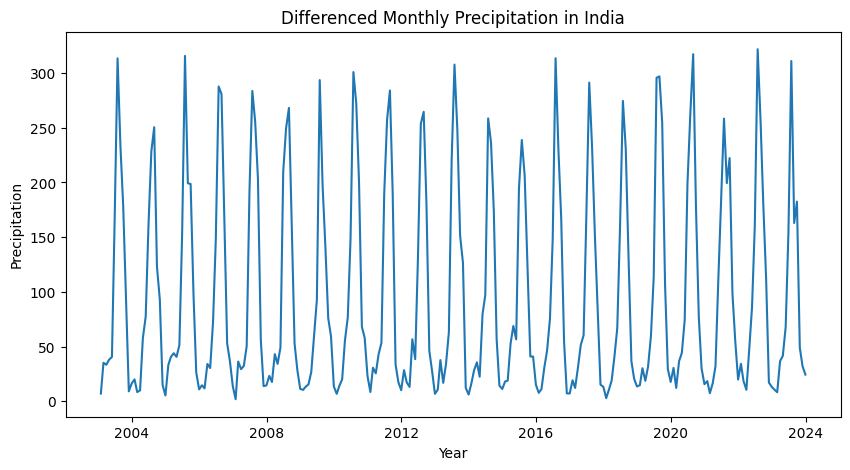

In [16]:
if result_india[1] > 0.05:
    india_data_diff = monthly_rain_data.diff().dropna()
    result_india_diff = adfuller(india_data_diff)
    print('India Differenced ADF Statistic:', result_india_diff[0])
    print('India Differenced p-value:', result_india_diff[1])
else:
    india_data_diff = monthly_rain_data

plt.figure(figsize=(10, 5))
plt.plot(india_data_diff)
plt.title('Differenced Monthly Precipitation in India')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.show()

In [17]:

# Fit the ARMA(1, 1) model
model_india = ARIMA(india_data_diff, order=(1, 0, 1))
model_india_fit = model_india.fit()

# Print the model summary
print(model_india_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  252
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1381.360
Date:                Wed, 02 Oct 2024   AIC                           2770.719
Time:                        15:38:47   BIC                           2784.837
Sample:                    01-31-2003   HQIC                          2776.400
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.2852     19.365      4.920      0.000      57.330     133.241
ar.L1          0.6120      0.085      7.237      0.000       0.446       0.778
ma.L1          0.3931      0.080      4.919      0.0

In [18]:
start_india = len(india_data_diff)
end_india = start_india + (21*12)
predictions_india = model_india_fit.predict(start=start_india, end=end_india)

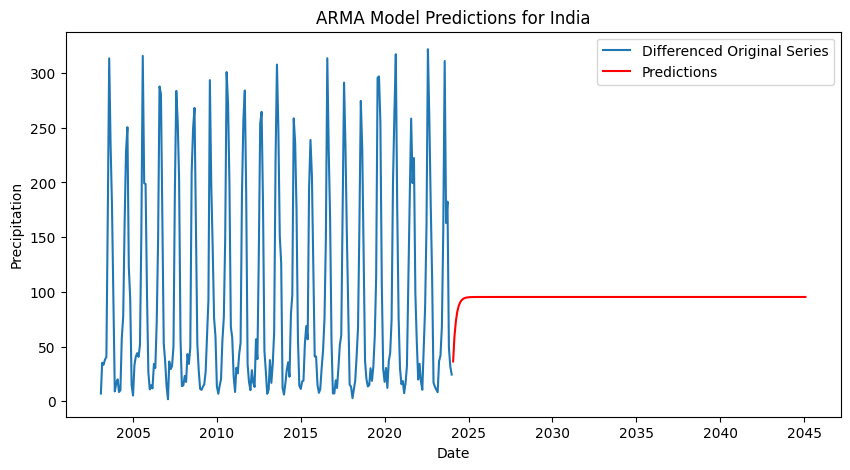

In [19]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(india_data_diff, label='Differenced Original Series')
plt.plot(predictions_india, label='Predictions', color='red')
plt.legend()
plt.title('ARMA Model Predictions for India')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

In [20]:
pip install scikit-learn

In [21]:
best_aic = float('inf')
best_order_india = None
best_model_india = None

for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(india_data_diff, order=(p, 0, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order_india = (p, 0, q)
                best_model_india = model_fit
        except Exception as e:
            print(f"Error fitting ARMA({p}, 0, {q}): {str(e)}")

print('Best ARMA order for India:', best_order_india)
print('Best AIC:', best_aic)

if best_model_india is not None:
    print(best_model_india.summary())
else:
    print("No valid model was found.")

c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

Best ARMA order for India: (4, 0, 4)
Best AIC: 2479.8747021587906
                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  252
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1229.937
Date:                Wed, 02 Oct 2024   AIC                           2479.875
Time:                        15:39:18   BIC                           2515.169
Sample:                    01-31-2003   HQIC                          2494.076
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.4630      4.081     23.394      0.000      87.465     103.461
ar.L1          2.7235      0.023    117.958      0.000       2.67

c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\harsh\AppData\Local\Temp\ipykernel_23460\2667355048.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=india_data_diff.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='M')


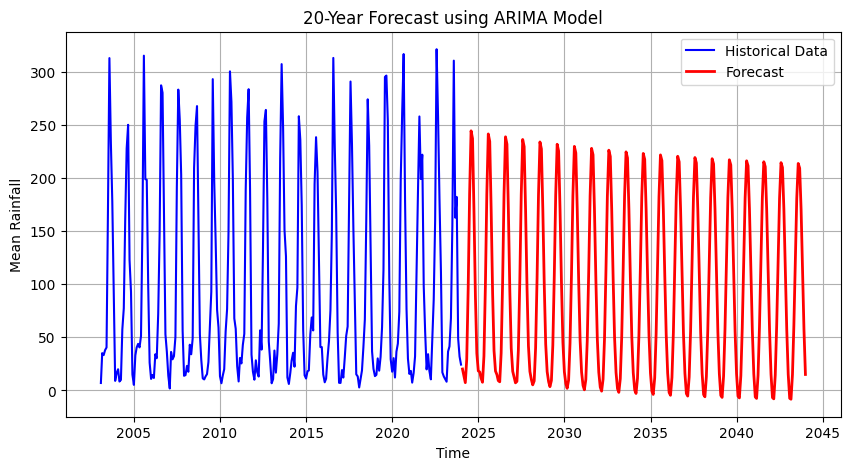

In [22]:
# Forecasting the next 20 years (240 months for monthly data)
forecast_period = 240  # Change based on your data frequency
forecast = best_model_india.get_forecast(steps=forecast_period)
forecast_index = pd.date_range(start=india_data_diff.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='M')
forecast_values = forecast.predicted_mean

# Plotting the historical data and forecast
plt.figure(figsize=(10,5))
plt.plot(india_data_diff.index, india_data_diff, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red', linewidth=2)  # Single line for forecast

plt.title('20-Year Forecast using ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Mean Rainfall')
plt.legend()
plt.grid()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your data
data = pd.read_excel(r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx', index_col='time', parse_dates=True)

# Select the columns for analysis and resample to monthly frequency
monthly_rain_data = data['Mean_Rainfall'].resample('M').sum()

# Split the data into train (80%) and test (20%) sets
train_data = monthly_rain_data[:'2017-12-31']
test_data = monthly_rain_data['2018-01-01':]

C:\Users\harsh\AppData\Local\Temp\ipykernel_8776\1007623484.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rain_data = data['Mean_Rainfall'].resample('M').sum()


In [2]:
# # Check for stationarity and difference if necessary
# def check_stationarity(data):
#     result = adfuller(data)
#     if result[1] > 0.05:
#         return data.diff().dropna()
#     return data

# train_result_india = adfuller(train_data)
# print('India ADF Statistic train:', train_result_india[0])
# print('India p-value train:', train_result_india[1])

# test_result_india = adfuller(test_data)
# print('India ADF Statistic test:', test_result_india[0])
# print('India p-value test:', test_result_india[1])

# train_data_diff = check_stationarity(train_data)
# test_data_diff = check_stationarity(test_data)

# print('After India ADF Statistic train:', adfuller(train_data_diff)[0])
# print('After India p-value train:', adfuller(train_data_diff)[1])

# test_result_india = adfuller(test_data)
# print('After India ADF Statistic test:', adfuller(test_data_diff)[0])
# print('After India p-value test:',adfuller(test_data_diff)[1])

train_data_diff = train_data
test_data_diff = test_data


In [3]:
def find_best_arma(data):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    for p in range(6):
        for q in range(6):
            try:
                model = ARIMA(data, order=(p, 0, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, 0, q)
                    best_model = model_fit
            except Exception as e:
                continue
    
    return best_model, best_order

# Find the best ARMA model
best_model, best_order = find_best_arma(train_data_diff)

print('Best ARMA order:', best_order)
print('Best AIC:', best_model.aic)
print(best_model.summary())

c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible st

Best ARMA order: (4, 0, 4)
Best AIC: 1769.3531857584312
                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  180
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -874.677
Date:                Fri, 04 Oct 2024   AIC                           1769.353
Time:                        19:16:18   BIC                           1801.283
Sample:                    01-31-2003   HQIC                          1782.299
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.0521      4.284     21.953      0.000      85.655     102.449
ar.L1          2.7051      0.036     75.857      0.000       2.635       2.

Mean Squared Error: 1309.3156381433037
Root Mean Squared Error: 36.18446680750324
Mean Absolute Error: 24.986131561304106
R-squared Score: 0.8590278523080006


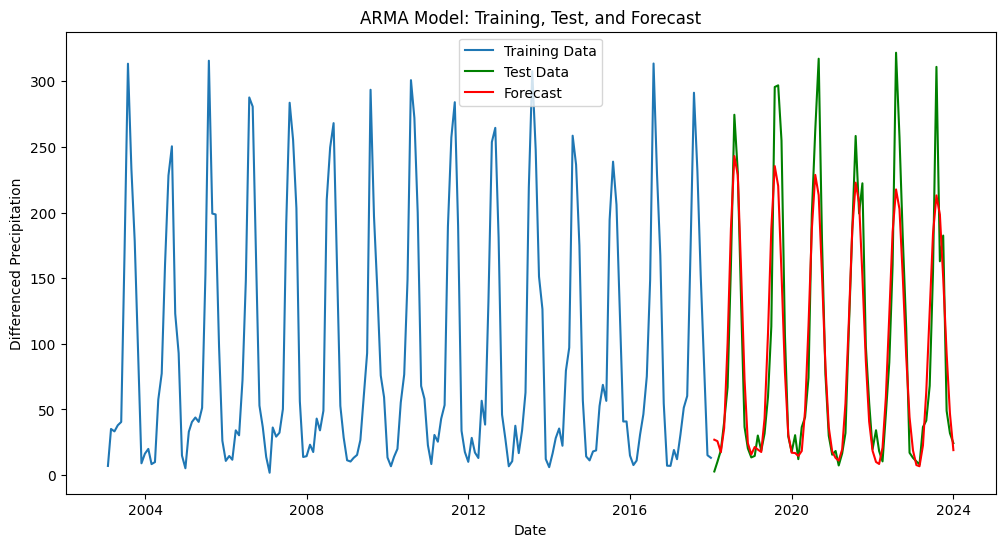

In [4]:
# Forecast for the test period
forecast = best_model.get_forecast(steps=len(test_data_diff))
forecast_mean = forecast.predicted_mean

# Calculate accuracy metrics
mse = mean_squared_error(test_data_diff, forecast_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_diff, forecast_mean)
r2 = r2_score(test_data_diff, forecast_mean)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data_diff.index, train_data_diff, label='Training Data')
plt.plot(test_data_diff.index, test_data_diff, label='Test Data', color='green')
plt.plot(test_data_diff.index, forecast_mean, label='Forecast', color='red')
plt.title('ARMA Model: Training, Test, and Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Precipitation')
plt.legend()
plt.show()

In [5]:
import pandas as pd

# Assuming you've already loaded your data and performed the resampling
# If not, uncomment and modify the following lines:
# data = pd.read_excel(r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx', index_col='time', parse_dates=True)
# rain_data = data['Mean_Rainfall']
# monthly_rain_data = rain_data.resample('M').sum()

# Convert the index to datetime if it's not already
monthly_rain_data.index = pd.to_datetime(monthly_rain_data.index)

# Create a DataFrame with the date as a column
df_export = pd.DataFrame({
    'Date': monthly_rain_data.index.strftime('%Y-%m-%d'),
    'Monthly_Rainfall': monthly_rain_data.values
})

# Export to Excel
output_path = r'C:\Users\harsh\Desktop\Btech_project\Dataset\monthly_imd_rainfall_2003_2023.xlsx'
df_export.to_excel(output_path, index=False)

print(f"Monthly IMD rainfall data has been exported to: {output_path}")

Monthly IMD rainfall data has been exported to: C:\Users\harsh\Desktop\Btech_project\Dataset\monthly_imd_rainfall_2003_2023.xlsx


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you've already run the ARMA model and generated the forecast
# If not, uncomment and modify the following lines:
# best_model, best_order = find_best_arma(train_data_diff)
# forecast = best_model.get_forecast(steps=len(test_data_diff))
# forecast_mean = forecast.predicted_mean

# Create a DataFrame with the forecasted data
forecast_df = pd.DataFrame({
    'Date': test_data_diff.index,
    'Forecasted_Rainfall': forecast_mean.values,
    'Actual_Rainfall': test_data_diff.values
})

# Export to Excel
output_path = r'C:\Users\harsh\Desktop\Btech_project\Dataset\arma_forecast_results.xlsx'
forecast_df.to_excel(output_path, index=False)

print(f"ARMA model forecast results have been exported to: {output_path}")

# Optionally, you can also include the model details and performance metrics
with pd.ExcelWriter(output_path, mode='a') as writer:
    pd.DataFrame({
        'Metric': ['Best ARMA Order', 'Best AIC', 'MSE', 'RMSE', 'MAE', 'R-squared'],
        'Value': [str(best_order), best_model.aic, mse, rmse, mae, r2]
    }).to_excel(writer, sheet_name='Model_Details', index=False)

print("Model details and performance metrics have been added to the Excel file.")

ARMA model forecast results have been exported to: C:\Users\harsh\Desktop\Btech_project\Dataset\arma_forecast_results.xlsx
Model details and performance metrics have been added to the Excel file.
